In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
PATH = 'raw/New_DB.xlsx'
df = pd.read_excel(PATH)

In [57]:
df.head()

,Región,Comuna,Tipo Remoción en masa,Factor desencadenante,Fecha Evento,Longitud,Latitud,Sistema Georeferencia,Cota (m.s.n.m),slope,PP,valor_humedad_suelo1,valor_humedad_suelo2,valor_humedad_suelo3,valor_humedad_suelo4
0,Los Lagos,Castro,Flujo,Precipitaciones,07-03-2001,-73.7855,-42.4686,WGS 84- UTM 18 S,-,37.616885,11.358299,0.460907,0.417099,0.387939,0.410934
1,Los Lagos,Castro,Flujo,Precipitaciones,09-03-2001,-73.7855,-42.4686,WGS 84- UTM 18 S,-,37.616885,282.989359,0.467758,0.467758,0.466522,0.425278
2,Los Lagos,Chaitén,Deslizamiento,Precipitaciones,03-05-2002,-72.6983,-42.4087,WGS 84- UTM 18 S,-,58.718334,83.771901,0.436966,0.437408,0.438400,0.438980
3,Los Lagos,Río Negro,Deslizamiento,Precipitaciones,09-08-2002,-73.7889,-40.7083,WGS 84- UTM 18 S,6,40.098548,101.366892,0.515045,0.513718,0.519211,0.517426
4,Los Lagos,Osorno,Deslizamiento,Precipitaciones,22-08-2007,-73.6047,-40.5750,WGS 84- UTM 18 S,126,42.977906,0.000000,0.478531,0.480499,0.477859,0.500580


In [58]:
df.isnull().sum()

Región                     0
Comuna                     0
Tipo Remoción en masa      0
Factor desencadenante      0
Fecha Evento               0
Longitud                   0
Latitud                    0
Sistema Georeferencia      0
Cota (m.s.n.m)            20
slope                      1
PP                         0
valor_humedad_suelo1     138
valor_humedad_suelo2     138
valor_humedad_suelo3     138
valor_humedad_suelo4     138
dtype: int64

In [59]:
columns = ['slope', 'PP', 'valor_humedad_suelo1',
           'valor_humedad_suelo2', 'valor_humedad_suelo3', 'valor_humedad_suelo4']
X = df.loc[:, columns]

In [60]:
valor_humedad_suelo = ['valor_humedad_suelo1', 'valor_humedad_suelo2', 'valor_humedad_suelo3',
                       'valor_humedad_suelo4']
humedad_mean = X[valor_humedad_suelo].mean()    
X[valor_humedad_suelo] = X[valor_humedad_suelo].fillna(value=humedad_mean)
X.dropna(inplace=True)

In [61]:
print(f'Valores nulos: {X.isnull().sum().sum()}\nDimensión del nuevo dataset: {X.shape}\nDimensión de dataset original: {df.shape}\n Columnas: {X.columns}')

Valores nulos: 0
Dimensión del nuevo dataset: (416, 6)
Dimensión de dataset original: (417, 15)
 Columnas: Index(['slope', 'PP', 'valor_humedad_suelo1', 'valor_humedad_suelo2',
       'valor_humedad_suelo3', 'valor_humedad_suelo4'],
      dtype='object')


In [62]:
#Colores Gráficos
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']
color = sns.color_palette("pink")

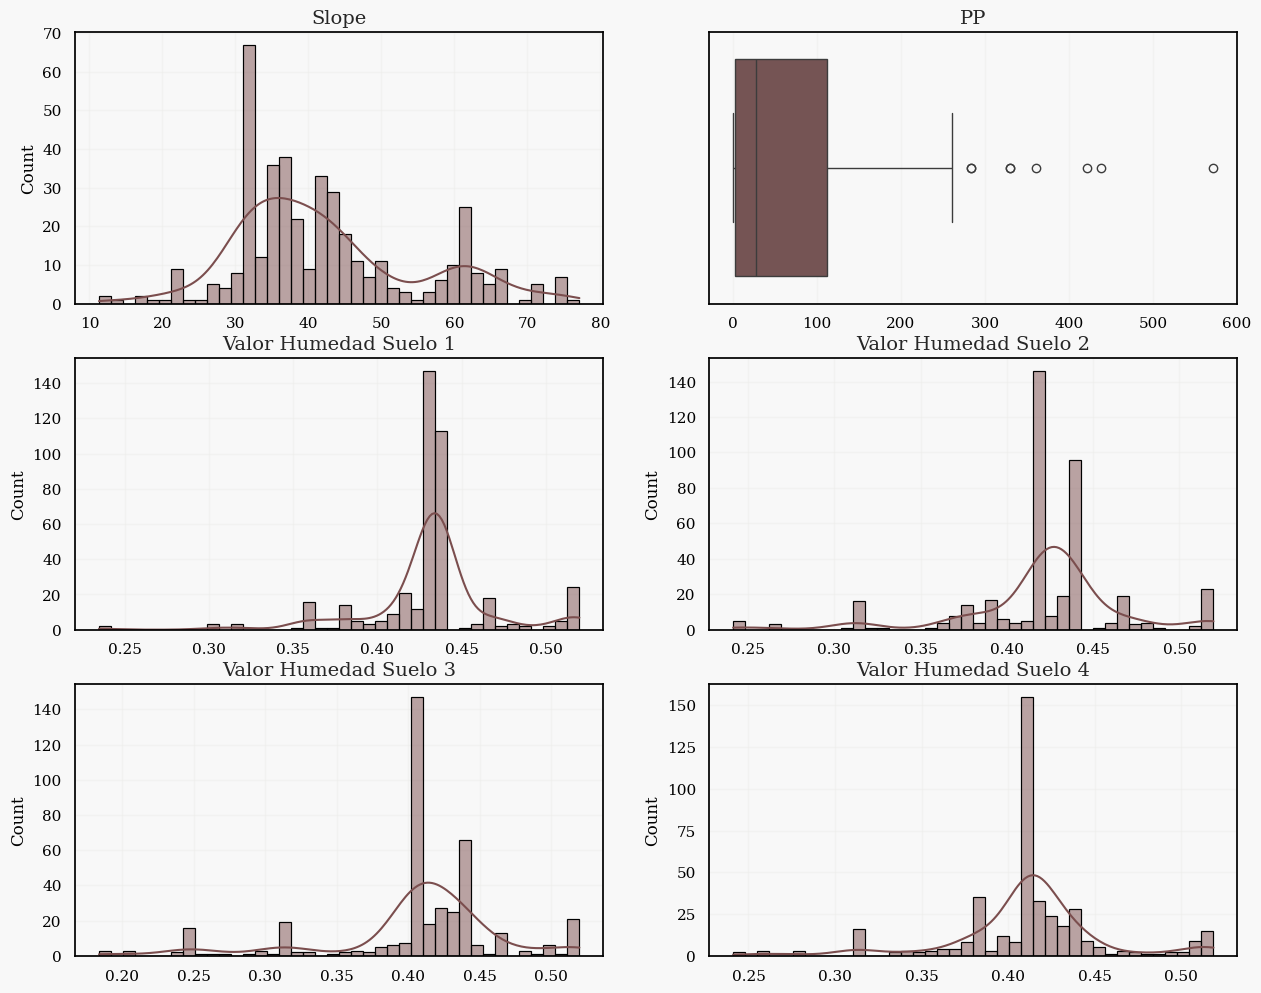

In [63]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,12))

sns.histplot(X.slope, ax=ax[0,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[0,0].set_title('Slope', fontsize=14)
ax[0,0].set_xlabel('')

sns.boxplot(X.PP, ax=ax[0,1], color=color[0], orient='h')
ax[0,1].set_title('PP', fontsize=14)
ax[0,1].set_xlabel('')

sns.histplot(X.valor_humedad_suelo1, ax=ax[1,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[1,0].set_title('Valor Humedad Suelo 1', fontsize=14)
ax[1,0].set_xlabel('')

sns.histplot(X.valor_humedad_suelo2, ax=ax[1,1], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[1,1].set_title('Valor Humedad Suelo 2', fontsize=14)
ax[1,1].set_xlabel('')

sns.histplot(X.valor_humedad_suelo3, ax=ax[2,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[2,0].set_title('Valor Humedad Suelo 3', fontsize=14)
ax[2,0].set_xlabel('')

sns.histplot(X.valor_humedad_suelo4, ax=ax[2,1], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[2,1].set_title('Valor Humedad Suelo 4', fontsize=14)
ax[2,1].set_xlabel('')

plt.show()

In [64]:
X.describe()

,slope,PP,valor_humedad_suelo1,valor_humedad_suelo2,valor_humedad_suelo3,valor_humedad_suelo4
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,42.341600,65.934180,0.432158,0.421610,0.406082,0.412190
std,12.511018,81.915905,0.038082,0.046257,0.061454,0.044080
min,11.310793,0.000000,0.234695,0.241333,0.183578,0.241119
25%,33.310814,1.826394,0.432158,0.421610,0.406082,0.404613
50%,38.853602,27.659902,0.432158,0.421610,0.406082,0.412190
75%,48.413690,111.389278,0.438995,0.438919,0.438400,0.426201
max,77.123479,572.187521,0.520004,0.519699,0.519791,0.518738


In [65]:
X = X.drop(X.PP.idxmax())
X = X.reset_index(drop=True)

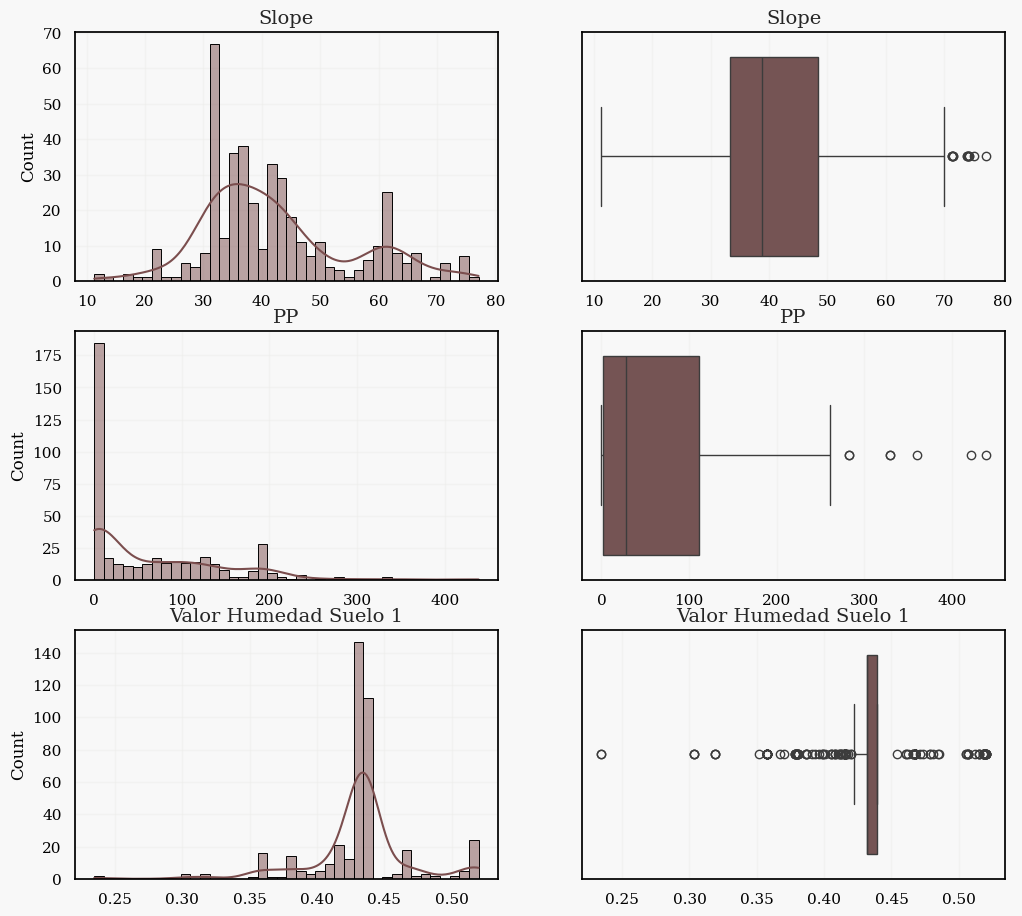

In [66]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,11))

sns.histplot(X.slope, ax=ax[0,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[0,0].set_title('Slope', fontsize=14)
ax[0,0].set_xlabel('')
sns.boxplot(X.slope, ax=ax[0,1], color=color[0], orient='h')
ax[0,1].set_title('Slope', fontsize=14)
ax[0,1].set_xlabel('')

sns.histplot(X.PP, ax=ax[1,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[1,0].set_title('PP', fontsize=14)
ax[1,0].set_xlabel('')
sns.boxplot(X.PP, ax=ax[1,1], color=color[0], orient='h')
ax[1,1].set_title('PP', fontsize=14)
ax[1,1].set_xlabel('')

sns.histplot(X.valor_humedad_suelo1, ax=ax[2,0], kde=True, edgecolor='black', color=color[0], bins = 40)
ax[2,0].set_title('Valor Humedad Suelo 1', fontsize=14)
ax[2,0].set_xlabel('')
sns.boxplot(X.valor_humedad_suelo1, ax=ax[2,1], color=color[0], orient='h')
ax[2,1].set_title('Valor Humedad Suelo 1', fontsize=14)
ax[2,1].set_xlabel('')

plt.show()

In [67]:
class_drops = ['valor_humedad_suelo2', 'valor_humedad_suelo3', 'valor_humedad_suelo4']
X = X.drop(labels=class_drops, axis=1)

In [68]:
X.describe()

,slope,PP,valor_humedad_suelo1
count,415.000000,415.000000,415.000000
mean,42.282196,64.714292,0.432142
std,12.467241,78.140055,0.038126
min,11.310793,0.000000,0.234695
25%,33.286370,1.811167,0.432158
50%,38.804579,27.542932,0.432158
75%,48.413690,111.369088,0.438995
max,77.123479,438.595865,0.520004


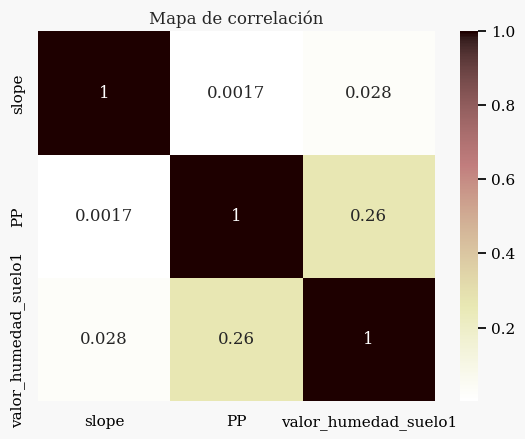

In [69]:
heatmap = sns.heatmap(np.abs(X.corr()),annot=True, cmap='pink_r')
heatmap.set_title('Mapa de correlación')
plt.show()

In [70]:
columns =['slope', 'PP', 'valor_humedad_suelo1']
X = df.loc[:,columns]

df_general = X * 1
n_df_general = X * 0.8
df_general['output'] = 1
n_df_general['output'] = 0

df_output = pd.concat([df_general, n_df_general])

X_slope_PP = df_output.drop('valor_humedad_suelo1', axis=1)
X_slope_PP_vhs1 = df_output

X_slope_PP = X_slope_PP.dropna()
X_slope_PP_vhs1 = X_slope_PP_vhs1.dropna()
X_slope_PP = X_slope_PP.reset_index(drop=True)
X_slope_PP_vhs1 = X_slope_PP_vhs1.reset_index(drop=True)

In [76]:
path_processed_data = 'processed'
"""X_slope_PP.to_csv(f'{path_processed_data}/X_slope_PP.csv', index=False)
X_slope_PP_vhs1.to_csv(f'{path_processed_data}/X_slope_PP_vhs1.csv', index=False)"""

"X_slope_PP.to_csv(f'{path_processed_data}/X_slope_PP.csv', index=False)\nX_slope_PP_vhs1.to_csv(f'{path_processed_data}/X_slope_PP_vhs1.csv', index=False)"